Dados usados na aula do dia 05/09/2025

Usado com um método de otimização para encontrar melhor conjunto fuzzy para previsão de cancelamento de contas.

In [2]:
#!pip -q install scikit-fuzzy

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df =pd.read_csv('BankChurners.csv')

In [5]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [6]:
df['churn']= (df['Attrition_Flag']).str.contains('Attrited Customer').astype(int)

In [7]:
cols=['Customer_Age', "Total_Trans_Ct", "Months_Inactive_12_mon"]

In [8]:
age_min = df['Customer_Age'].min()
age_max = df['Customer_Age'].max()
trn_min =df['Total_Trans_Ct'].min()
trn_max =df['Total_Trans_Ct'].max()
mon_min =df['Months_Inactive_12_mon'].min()
mon_max =df['Months_Inactive_12_mon'].max()

U_age = np.linspace(age_min, age_max, 100)
U_trn = np.linspace(trn_min, trn_max, 100)
U_mon = np.linspace(mon_min, mon_max, 50)

U_out =np.linspace(0, 1, 101)

idade = ctrl.Antecedent(U_age, 'idade')
transacoes = ctrl.Antecedent(U_trn, 'transacoes')
inativos = ctrl.Antecedent(U_mon, 'inativos')

risco = ctrl.Consequent(U_out, 'risco')


trans percentis (20 50 80): [41. 78. 83.]
idade percentis (25 50 75): [41. 46. 52.]


c:\Users\84284528572\Desktop\GitHub\Quarto_Semestre_Ciencia_de_Dados\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


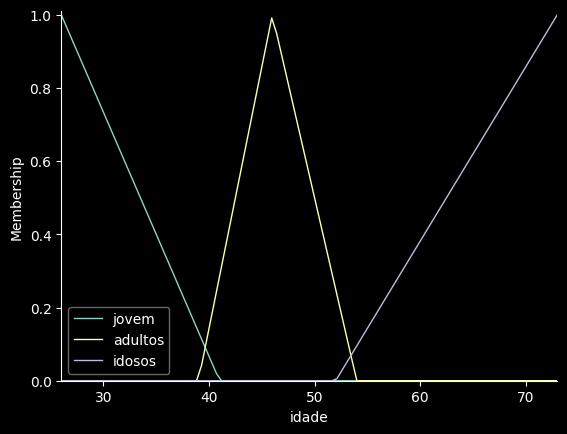

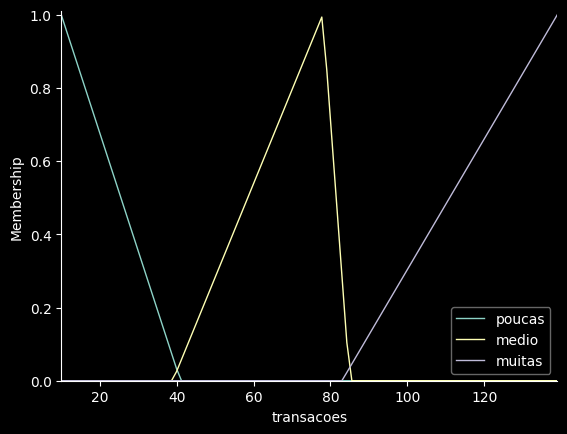

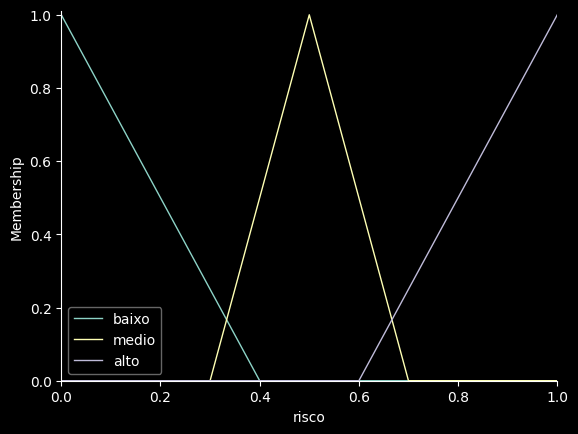

In [9]:
p_trn = np.percentile(df['Total_Trans_Ct'], [20, 70,80])
p_age = np.percentile(df['Customer_Age'], [25,50,75])

print('trans percentis (20 50 80):' , p_trn)
print('idade percentis (25 50 75):', p_age)


idade['jovem'] = fuzz.trimf(idade.universe, [U_age.min(), U_age.min(),  p_age[0]])
idade['adultos'] =  fuzz.trimf(idade.universe, [ p_age[0]-2, p_age[1], p_age[2]+2])
idade['idosos'] = fuzz.trimf(idade.universe, [p_age[2], U_age.max(), U_age.max()])

idade.view()

transacoes['poucas'] = fuzz.trimf(transacoes.universe, [U_trn.min(), U_trn.min(),  p_trn[0]])
transacoes['medio'] = fuzz.trimf(transacoes.universe, [ p_trn[0]-2, p_trn[1], p_trn[2]+2])
transacoes['muitas'] = fuzz.trimf(transacoes.universe, [p_trn[2], U_trn.max(), U_trn.max()])

transacoes.view()

risco['baixo']= fuzz.trimf(risco.universe, [U_out.min(), U_out.min(), 0.4])
risco['medio']= fuzz.trimf(risco.universe, [0.3, 0.5, 0.7])
risco['alto']= fuzz.trimf(risco.universe, [0.6, 1, 1])

risco.view()

genoma = [t1, t2, t3, ina1, ina2]

In [10]:
regra1= ctrl.Rule(idade['jovem'] & transacoes['poucas'], risco['alto'])
regra2= ctrl.Rule(idade['jovem'] & transacoes['medio'], risco['alto'])
regra3= ctrl.Rule(idade['jovem'] & transacoes['muitas'], risco['baixo'])
regra4= ctrl.Rule(idade['adultos'] & transacoes['poucas'], risco['alto'])
regra5= ctrl.Rule(idade['adultos'] & transacoes['medio'], risco['medio'])
regra6= ctrl.Rule(idade['adultos'] & transacoes['muitas'], risco['baixo'])
regra7= ctrl.Rule(idade['idosos'] & transacoes['poucas'], risco['medio'])
regra8= ctrl.Rule(idade['idosos'] & transacoes['medio'], risco['medio'])



In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
def buildscore(params, df_data):

  t1, t2, t3, ina_a, ina_b = params

# ordena parametros para garantir consistencia na hora que chamar a função trimf(_, t1,t2,t3)
  t1, t2, t3 = sorted([float(t1), float(t2), float(t3)])
  ina_a, ina_b = sorted([float(ina_a), float(ina_b)])

  age_min = df['Customer_Age'].min()
  age_max = df['Customer_Age'].max()
  trn_min =df['Total_Trans_Ct'].min()
  trn_max =df['Total_Trans_Ct'].max()
  mon_min =df['Months_Inactive_12_mon'].min()
  mon_max =df['Months_Inactive_12_mon'].max()

  eps_t = max(1e-6, 0.001*(trn_max-trn_min if trn_max>trn_min else 1.0   ))
  eps_i = max(1e-6, 0.001*(mon_max-mon_min if mon_max>mon_min else 1.0   ))

  t1= float(np.clip(t1, trn_min, trn_max - 2*eps_t))
  t2= float(np.clip(t2, trn_min + eps_t, trn_max - eps_t))
  t3= float(np.clip(t3, trn_min + 2*eps_t, trn_max))

  ina_a= float(np.clip(ina_a, mon_min, mon_max - 2*eps_i))
  ina_b= float(np.clip(ina_b, mon_min + eps_i, mon_max - eps_i))

  U_age = np.linspace(age_min, age_max, 100)
  U_trn = np.linspace(trn_min, trn_max, 100)
  U_mon = np.linspace(mon_min, mon_max, 50)

  U_out =np.linspace(0, 1, 101)

  idade = ctrl.Antecedent(U_age, 'idade')
  transacoes = ctrl.Antecedent(U_trn, 'transacoes')
  mesinativo = ctrl.Antecedent(U_mon, 'mesinativos')

  risco = ctrl.Consequent(U_out, 'risco')

  idade['jovem'] = fuzz.trimf(idade.universe, [U_age.min(), U_age.min(),  p_age[0]])
  idade['adultos'] =  fuzz.trimf(idade.universe, [ p_age[0]-2, p_age[1], p_age[2]+2])
  idade['idoso'] = fuzz.trimf(idade.universe, [p_age[2], U_age.max(), U_age.max()])

  transacoes['poucos'] = fuzz.trimf(transacoes.universe, [U_trn.min(), U_trn.min(), t2])
  transacoes['medio'] = fuzz.trimf(transacoes.universe, [ t1, t2, t3])
  transacoes['muitas'] = fuzz.trimf(transacoes.universe, [t2, U_trn.max(), U_trn.max()])

  mesinativo['poucos'] = fuzz.trapmf(mesinativo.universe, [U_mon.min(), U_mon.min(), ina_a, ina_b])
  mesinativo['muitos'] = fuzz.trapmf(mesinativo.universe, [ ina_a, ina_b, U_mon.max(), U_mon.max()])


  risco['baixo']= fuzz.trimf(risco.universe, [0, 0, 0.4])
  risco['medio']= fuzz.trimf(risco.universe, [0.3, 0.5, 0.7])
  risco['alto']= fuzz.trimf(risco.universe, [0.6, 1, 1])

  rules = [ ctrl.Rule(transacoes['poucos'] & mesinativo['muitos'], risco['alto']),
           ctrl.Rule(transacoes['poucos'] & mesinativo['poucos'], risco['medio']),
           ctrl.Rule(transacoes['muitas'] , risco['baixo']),
           ctrl.Rule(idade['idoso'] & mesinativo['muitos'], risco['alto']),
            ctrl.Rule(idade['jovem'] & transacoes['medio'], risco['medio'])
  ]
  sistema = ctrl.ControlSystem(  rules )
  sim = ctrl.ControlSystemSimulation(sistema)
  risco=[]

  for k, linha in df_data.iterrows():
    sim.input['idade'] = linha['Customer_Age']
    sim.input['transacoes'] = linha['Total_Trans_Ct']
    sim.input['mesinativos'] = linha['Months_Inactive_12_mon']
    sim.compute()
    risco.append(sim.output['risco'])

  risco = np.array(risco)
  df_data['risco'] = risco

  auc = roc_auc_score(df_data['churn'], risco)

  return auc, {'t1': t1, 't2': t2, 't3': t3, 'ina_a': ina_a, 'ina_b': ina_b}, risco





In [ ]:
def make_small ( df, wsize=200 , seed= 123, cols=('churn', 'Customer_Age', 'Total_Trans_Ct', 'Months_Inactive_12_mon')):
  df_cols = df[list(cols)].copy()

  total = len(df_cols)
  frac_pos = df_cols['churn'].mean()

  n_pos = round(frac_pos*wsize)
  n_neg = wsize - n_pos

  g0=df_cols[df_cols['churn']==0]
  g1=df_cols[df_cols['churn']==1]

  r0=min(len(g0), n_neg)
  r1=min(len(g1), n_pos)

  s0=g0.sample(n=r0, random_state= seed, replace=False)
  s1=g1.sample(n=r1, random_state= seed, replace=False)

  df_small = pd.concat([s0, s1])

  df_small = df_small.sample(frac=1, random_state=seed).reset_index(drop=True)

  return df_small


In [ ]:
df_small = make_small(df, wsize=200)

In [ ]:
trn_p = np.percentile(df_small['Total_Trans_Ct'], [20, 50,80])
RANDOM_SEED   = 123

rng = np.random.default_rng(RANDOM_SEED)

def init_ind():
  return np.array([
      rng.normal(trn_p[0], 4.0),
      rng.normal(trn_p[1], 4.0),
      rng.normal(trn_p[2], 4.0),
      rng.uniform(df_small['Months_Inactive_12_mon'].min(), df_small['Months_Inactive_12_mon'].max()),
      rng.uniform(2,5)
  ], dtype=float)


npop, gen = 12, 8

pop = [init_ind() for _ in range(npop)]

best_hist = []

for g in range(gen):
  print(f'geracao {g}')
  fits = [buildscore(ind, df_small)[0] for ind in pop]
  order = np.argsort(fits)[::-1]
  pop =[pop[i] for i in order]
  fits = [fits[i] for i in order]
  # pop[0] melhor individuo fits[0]  é o melhor fit
  best_hist.append(fits[0])
  print(f"Gen {g+1}: best AUC(df small)={fits[0]:.3f}")

  elites = pop[:4]
  new_pop=elites.copy()
  while len(new_pop)<npop:
    p1, p2 = rng.choice(elites, size=2, replace=False)
    child = (p1+p2)/2.0 + rng.normal(0, [2,2,2,0.2,0.2])
    new_pop.append(child.astype(float))

  pop =new_pop






geracao 0
Gen 1: best AUC(df small)=0.778
geracao 1
Gen 2: best AUC(df small)=0.778
geracao 2
Gen 3: best AUC(df small)=0.791
geracao 3
Gen 4: best AUC(df small)=0.792
geracao 4
Gen 5: best AUC(df small)=0.809
geracao 5
Gen 6: best AUC(df small)=0.809
geracao 6
Gen 7: best AUC(df small)=0.809
geracao 7
Gen 8: best AUC(df small)=0.809


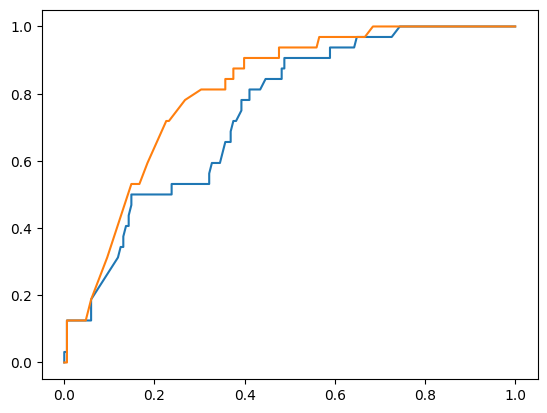

In [ ]:
best_ind= pop[0]

orig_params = np.array([trn_p[0], trn_p[1], trn_p[2], 2, 4], dtype=float)

auc_orig_dfs, _, risco_orig_dfs = buildscore(orig_params, df_small)
auc_otim_dfs, _, risco_otim_dfs = buildscore(best_ind, df_small)

auc_orig_fd, _, risco_orig_fd = buildscore(orig_params, df)
auc_otim_fd, _, risco_otim_fd = buildscore(best_ind, df)

y_dfs = df_small['churn'].values.astype(int)

fpr_o_dfs , tpr_o_dfs, _ = roc_curve(y_dfs, risco_orig_dfs)
fpr_op_dfs , tpr_op_dfs, _ = roc_curve(y_dfs, risco_otim_dfs)


fig = plt.plot(figsize=(6,6))
plt.plot(fpr_o_dfs, tpr_o_dfs)
plt.plot(fpr_op_dfs, tpr_op_dfs)

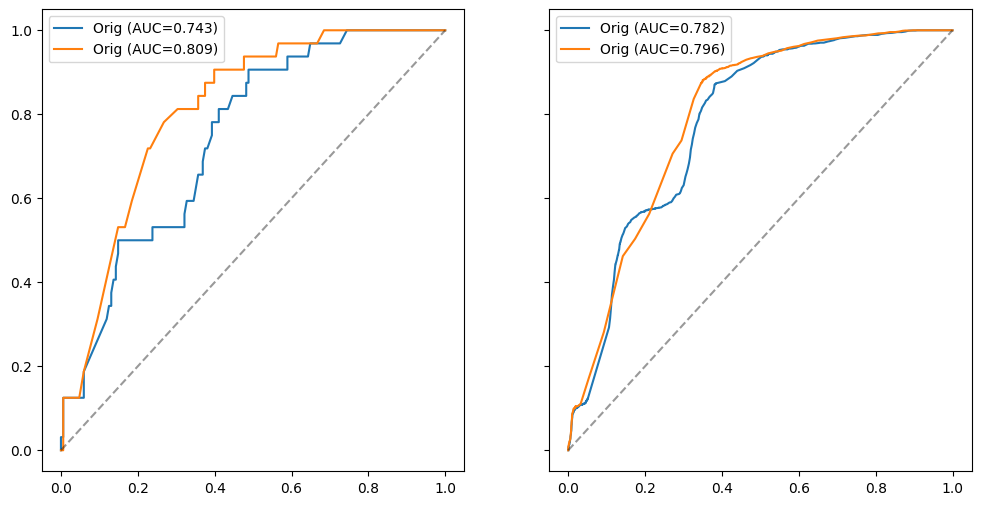

In [ ]:

y_fd = df['churn'].values.astype(int)

fpr_o_fd , tpr_o_fd, _ = roc_curve(y_fd, risco_orig_fd)
fpr_op_fd , tpr_op_fd, _ = roc_curve(y_fd, risco_otim_fd)


fig, axs = plt.subplots(1,2,figsize=(12,6), sharex=True, sharey=True)

axs[0].plot(fpr_o_dfs, tpr_o_dfs,label=f'Orig (AUC={auc_orig_dfs:.3f})')
axs[0].plot(fpr_op_dfs, tpr_op_dfs,label=f'Orig (AUC={auc_otim_dfs:.3f})')
axs[0].plot([0,1],[0,1],'k--',alpha=0.4)
axs[0].legend()
axs[1].plot(fpr_o_fd, tpr_o_fd,label=f'Orig (AUC={auc_orig_fd:.3f})')
axs[1].plot(fpr_op_fd, tpr_op_fd,label=f'Orig (AUC={auc_otim_fd:.3f})')
axs[1].plot([0,1],[0,1],'k--',alpha=0.4)
axs[1].legend()

#Para brincar no final de semana.

Fazer os plots das variáveis fuzzy originais e das otimizadas

Criar uma variável que utiliza "Total_Trans_Amt" e testar se com essa nova variável e uma população maior e mais gerações você consegue uma AUC (área debaixo da curva) maior.

Adicione parâmetros no genoma que permitam a adaptação dessa nova variável, e se quiser altere 'idade' para que aceite parâmetros do genoma (atualmente idade entras nas regras mas de maneira constante).

Lembre-se de criar regras de inferência fuzzy para a nova variável criada.